In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
import math as m

In [199]:
dataset = pd.read_csv('C:/Users/tdoshi/OneDrive - Capgemini/Desktop/DataSets/diabetes.csv')
dataset.head(10)

,Glucose,BloodPressure,Insulin,DiabetesPedigreeFunction,Age,Outcome
0,148,72,0,0.627,50,1
1,85,66,0,0.351,31,0
2,183,64,0,0.672,32,1
3,89,66,94,0.167,21,0
4,137,40,168,2.288,33,1
5,116,74,0,0.201,30,0
6,78,50,88,0.248,26,1
7,115,0,0,0.134,29,0
8,197,70,543,0.158,53,1
9,125,96,0,0.232,54,1


In [200]:
zero_replacement = ['Glucose', 'BloodPressure','Insulin']
for column in zero_replacement:
    dataset[column] = dataset[column].replace(0, np.NaN)
    mean = int(dataset[column].mean(skipna=True))
    dataset[column] = dataset[column].replace(np.NaN, mean)

In [201]:
dataset.head(10)

,Glucose,BloodPressure,Insulin,DiabetesPedigreeFunction,Age,Outcome
0,148.0,72.0,155.0,0.627,50,1
1,85.0,66.0,155.0,0.351,31,0
2,183.0,64.0,155.0,0.672,32,1
3,89.0,66.0,94.0,0.167,21,0
4,137.0,40.0,168.0,2.288,33,1
5,116.0,74.0,155.0,0.201,30,0
6,78.0,50.0,88.0,0.248,26,1
7,115.0,72.0,155.0,0.134,29,0
8,197.0,70.0,543.0,0.158,53,1
9,125.0,96.0,155.0,0.232,54,1


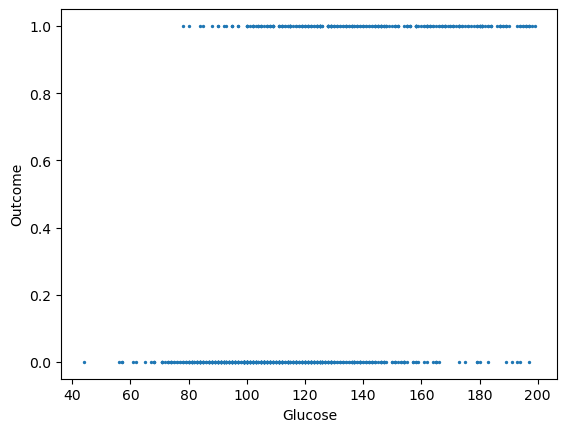

In [202]:
dataset.plot.scatter(x = 'Glucose', y = 'Outcome', s = 2);

In [203]:
print(m.sqrt(len(dataset)))
# 27 will be the 'k' value

27.712812921102035


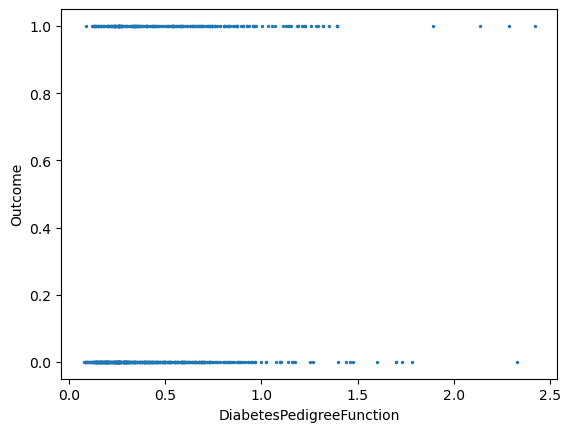

In [204]:
dataset.plot.scatter(x = 'DiabetesPedigreeFunction', y = 'Outcome', s = 2);

In [205]:
def knn(g, dpf):
    euclidean = []
    for i in range(0, len(dataset)):
        x2 = dataset.loc[i, 'Glucose']
        y2 = dataset.loc[i, 'DiabetesPedigreeFunction']
        d = m.sqrt(((x2-g)**2)+((y2-dpf)**2))
        euclidean.append(d)
    dataset['euclidean'] = euclidean
    sorted_ds = dataset.sort_values(by='euclidean', ascending=True)
    knn_ds = pd.DataFrame()
    if m.ceil(m.sqrt(len(dataset)))%2==0:
        knn_ds = sorted_ds.head((m.ceil(m.sqrt(len(dataset))))-1)
    else:
        knn_ds = sorted_ds.head(m.ceil(m.sqrt(len(dataset))))
    knn_ds = knn_ds.reset_index()
    knn_ds = knn_ds.drop(['index'], axis=1)
    oc0=0
    oc1=0
    for i in range(0, len(z)):
        if knn_ds.loc[i,'Outcome']==0:
            oc0=oc0+1
        else:
            oc1=oc1+1
    f_oc = 0
    if oc0>oc1:
        f_oc = 0
    else:
        f_oc = 1
    euclidean.clear()
    dataset.drop(['euclidean'], axis=1, inplace=True)
    #u_ent = {'Glucose': g, 'BloodPressure': bp, 'Insulin': i, 'DiabetesPedigreeFunction': dpf, 'Age': age, 'Outcome': f_oc}
    #dataset.append(u_ent, ignore_index = True)
    sorted_ds.drop(["Glucose","BloodPressure","Insulin","DiabetesPedigreeFunction","Age","Outcome","euclidean"], axis= 1, inplace=True)
    knn_ds.drop(["Glucose","BloodPressure","Insulin","DiabetesPedigreeFunction","Age","Outcome","euclidean"], axis= 1, inplace=True)
    return f_oc

In [206]:
r = knn(69, 0.269)
if r==0:
    print("Possibility: NO")
else:
    print("Possibility: YES")

Possibility: NO
